<center><h1>Project X</h1><h2>ML Mobile Megaline Analysis</h2></center>

<b><u>Description:</u></b>

The telecom company that we work in asked us this time to examine the registered customers in the system that didn't yet made the transition to our latest "smart" and "ultra" plans and are still using our legacy one.

Since we already have a diagnosis we made in the past for those customers who have already switched to the new programs, all we have left to do is a general diagnosis of the existing data and move directly from it to building the forecasting model that will give us the answer with the highest accuracy of 0.75.

<b><u>Our plan:</u></b>

- Dev' a model that will examine the behavior of our customers with legacy plan

- Build an ML model that will tell us what is the best plan to our legacy plan customers according to there behavior

<hr><b><u>Index Menu:</u></b>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <b style="font-size: 17px;" id="index">index:</b> 
<br><br>  
<a href="#Step I">Step I - Open the data file and read the general information</a>
<br><br>     
<a href="#Step II">Step II - Split our source data</a>
<br> <br>    
<a href="#Step III">Step III - Investigate different models quality</a>
<br><br> 
<a href="#Step IV">Step IV - Check model quality</a>
<br><br> 
<a href="#Step V">Step V - Sanity check the model</a>
<br><br> 
<a href="#general_conclusion">General conclusion</a>   
</div>

<hr><div id="Step I"><h2>Step I - Open data and general info</h2><br><i>Loading all the libraries: pandas,numpy,matplotlib,etc</i></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd 
import numpy as np 

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import train_test_split to split data
from sklearn.model_selection import train_test_split

# import machine learning module from the sklearn library
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier

# import metrics for sanity check on model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

from IPython.display import display_html
from itertools import chain,cycle

import warnings
warnings.filterwarnings("ignore")

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


<hr><i>Loading Dataset</i>

In [2]:
# read the data
try:
    users_behavior = pd.read_csv('/datasets/users_behavior.csv')
except:
    users_behavior = pd.read_csv('users_behavior.csv')
print('Data has been read correctly!')

Data has been read correctly!


<hr><i>Data Describe:<i>

In [3]:
# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()
    print("\033[1m" + 'Users with plan for the current month (Ultra - 1, Smart - 0):') 
    display(df['is_ultra'].value_counts())
    print()
    users_behavior['is_ultra'].value_counts().plot(kind='bar',legend=True)
    plt.legend(['0 - Smart, 1 - Ultra'],loc='best')
    plt.xlabel('plan');
    plt.ylabel('count');
    plt.xticks(rotation = 0)
    plt.title('Histogram of Users with the new plan Smart or Ultra');
    plt.show();

information about Our "users_behavior" dataset:



,type,count,na,na%
calls,float64,3214,0,0.0
minutes,float64,3214,0,0.0
messages,float64,3214,0,0.0
mb_used,float64,3214,0,0.0
is_ultra,int64,3214,0,0.0



Head:


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0



Tail:


,calls,minutes,messages,mb_used,is_ultra
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0
3213,80.0,566.09,6.0,29480.52,1



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None


Describe:



,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000



Describe include: all :



,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

calls 40
minutes 40
messages 497
mb_used 11
is_ultra 2229


None


Shape: (3214, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object


Users with plan for the current month (Ultra - 1, Smart - 0):


0    2229
1     985
Name: is_ultra, dtype: int64

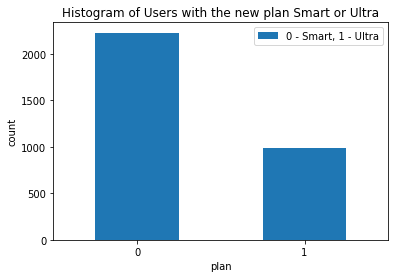

In [4]:
#print our info data
print('information about Our "users_behavior" dataset:')
general_info(users_behavior)

<hr><b><u>Data description:</u></b>
 
 Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
 
 - `сalls` — number of calls
 
 
 - `minutes` — total call duration in minutes
 
 
 - `messages` — number of text messages
 
 
 - `mb_used` — Internet traffic used in MB
 
 
 - `is_ultra` — plan for the current month (Ultra - 1, Smart - 0)

<hr><b style="font-size: 17px;">Missing values / Dtypes / Duplicated :</b>

No

<hr>

<b><u>Conclusion:</u></b>

As we expected of course there isn't any Missing values or Nan or duplicated rows in our dataset which is great , we also notice that almost triple of our users that already use the new plans prefer our 'smart' (2229) one plan than 'ultra' (985).

so let's start by splitting our source into 3 (train,valid and test) , using the ratio 3:1:1 (60% , 20%, 20%)

<hr><div id="Step II"><h2>Step II - Split the source data into (training, validation and test set)</h2></div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

To split our the data into 3 (train, valid set and test set) we going to use `sklearn.model_selection.train_test_split` twice. First we split the data into train and test with 20% of split data being the test data. Then we split the 80% train data obtained from the first split into validation and train. 

In [5]:
# split into train & test
users_behavior_train, users_behavior_test = train_test_split(users_behavior, test_size=0.20, random_state=12345)

# split train into valid & train 0.25 * 0.80 = 0.20 for valid size 
users_behavior_train, users_behavior_valid = train_test_split(users_behavior_train, test_size=0.25, random_state=12345) 

In [6]:
# shape of the split set
print('Train set now contains {}'.format(users_behavior_train.shape[0]) + ' users, representing 60 % of our data source') 
print('Valid set now contains {}'.format(users_behavior_valid.shape[0]) + ' users, representing 20 % of our data source')
print('Test  set now contains {}'.format(users_behavior_test.shape[0]) + '  users, representing 20 % of our data source')

Train set now contains 1928 users, representing 60 % of our data source
Valid set now contains 643 users, representing 20 % of our data source
Test  set now contains 643  users, representing 20 % of our data source


<hr><b><u>Intermediate conclusion:</u></b>

We succeeded to split our data source into 3 (train, valid and test set) , split 60% , 20% , 20% when we using the test size in the first split of 0.2 and in the Second one 0.25

- 60% into Train which contains 1928 users


- 20% into Valid which contains 643 users


- 20% into Test which contains 643 users

<hr><div id="Step III"><h2>Step III - Investigate the quality of different models by changing hyperparameters</h2><br>Briefly describe the findings of the study</div>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<b><u>Our Model dev'</u></b>

To proceed our mission to build and investigate the quality of different models. Since this classification task , we going to use:

- Decision Tree Classifier

- Logistic regression

- Random forest

We going to investigate them and see the result and then deciding which model is the one to use.

<b><u>Hyperparameter Tuning:</u></b>

<b><i>Decision Tree Classifier</i></b>

For our 'Decision Tree Classifier', we going to iterate over different values and compare there quality of the model by tuning the `max_depth` of hyperparameter

In [7]:
# declare features and target 
features_train = users_behavior_train.drop(['is_ultra'], axis=1)
target_train = users_behavior_train['is_ultra']
features_valid = users_behavior_valid.drop(['is_ultra'], axis=1)
target_valid = users_behavior_valid['is_ultra']
features_test = users_behavior_test.drop(['is_ultra'], axis=1)
target_test = users_behavior_test['is_ultra']

max_depth = 1 : Valid accuracy : 0.7387247278382582 | Train accuracy: 0.758298755186722
max_depth = 2 : Valid accuracy : 0.7573872472783826 | Train accuracy: 0.79201244813278
max_depth = 3 : Valid accuracy : 0.7651632970451011 | Train accuracy: 0.8117219917012448
max_depth = 4 : Valid accuracy : 0.7636080870917574 | Train accuracy: 0.8205394190871369
max_depth = 5 : Valid accuracy : 0.7589424572317263 | Train accuracy: 0.8272821576763485
max_depth = 6 : Valid accuracy : 0.7573872472783826 | Train accuracy: 0.8335062240663901
max_depth = 7 : Valid accuracy : 0.7744945567651633 | Train accuracy: 0.8506224066390041
max_depth = 8 : Valid accuracy : 0.7667185069984448 | Train accuracy: 0.8661825726141079
max_depth = 9 : Valid accuracy : 0.7620528771384136 | Train accuracy: 0.875
max_depth = 10 : Valid accuracy : 0.7713841368584758 | Train accuracy: 0.8910788381742739
max_depth = 11 : Valid accuracy : 0.7589424572317263 | Train accuracy: 0.9024896265560166
max_depth = 12 : Valid accuracy : 0

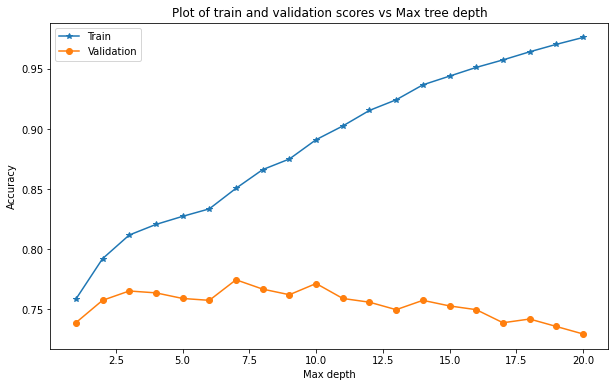

In [8]:
# fn decision tree classifier
def decision_tree_classifier(X_train, y_train, X_valid, y_valid):
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the tree depth
    tree_depth = [i for i in range(1, 21)]
    # create a loop for max_depth from 1 to 21
    for depth in tree_depth:
        model = DecisionTreeClassifier(random_state=12345, max_depth = depth) # create an instance of a class
        model.fit(X_train, y_train) # train the model
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print("max_depth =", depth, ": ", end='')
        print("Valid accuracy :",predictions_valid_acc,"|","Train accuracy:",train_predictions_acc)
    # plot of train and validation scores vs tree depth
    plt.figure(figsize=(10,6))
    plt.plot(tree_depth, train_scores, '-*', label='Train')
    plt.plot(tree_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs Max tree depth')
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # print the fn and the plot of decision tree classifier
decision_tree_classifier(features_train, target_train, features_valid, target_valid)

**' Decision Tree Classifier '** , can determines the right plan when we run a learning algorithm to train the model to make predictions. We created a loop to test our `max_depth` hyperparameter from 1 to 20 to see which depth gives us the best fit.
We note that when we test lower `max_depth` generally do not overfit but poor accuracy (high bias, low variance) and high depth give us overfit and much better accuracy (low bias, high variance), we need a balance between bias and variance - bias variance tradeoff. 

Our plot chart visualize the model and show the accuracy scores on the train and validation vs `max_depth`, we see that our accuracy is keeps increasing until `max_depth` No.4 and after it starts to decline. At `max_depth` No.4 we have accuracy of 82% for the train set and 76.3% for the valid set. so we choose `max_depth` tree No.4 as right one before the model begins to overfit the train set.  

<hr><br><b><i>Logistic Regression Model</i></b>

For our 'Logistic Regression Model', we going to iterate over different values and compare there quality of the model by tuning the `max_depth` of hyperparameter

In [9]:
# fn logistic regression model
def logistic_regression(X_train, y_train, X_valid, y_valid):
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(X_train, y_train) # train the model 
    model.score(X_train, y_train) # check the model's accuracy with score() method
    train_predictions = model.predict(X_train) # make predictions on train set
    predictions_valid = model.predict(X_valid) # make predictions on validation set
    print("Valid accuracy :",accuracy_score(y_valid, predictions_valid),"|","Train accuracy:",\
          accuracy_score(y_train, train_predictions))
    #  # print the fn logistic regression model
logistic_regression(features_train, target_train, features_valid, target_valid)

Valid accuracy : 0.7293934681181959 | Train accuracy: 0.7422199170124482


Although this model train is faster , the accuracy is lower and give us Valid of 73% and Train of 74.2% this lower than our target of 75% accuracy. 

This is because this model is not complex enough for underfitting occurs. We cannot use this model since both training and validation scores are low than what we looking for.

<hr><br><b><i>Random Forest Classifier</i></b>

n_estimator = 1 : Valid accuracy :  0.702954898911353  |  Train accuracy: 0.9024896265560166
n_estimator = 2 : Valid accuracy :  0.7573872472783826  |  Train accuracy: 0.9102697095435685
n_estimator = 3 : Valid accuracy :  0.744945567651633  |  Train accuracy: 0.9590248962655602
n_estimator = 4 : Valid accuracy :  0.7651632970451011  |  Train accuracy: 0.9481327800829875
n_estimator = 5 : Valid accuracy :  0.7620528771384136  |  Train accuracy: 0.970954356846473
n_estimator = 6 : Valid accuracy :  0.7698289269051322  |  Train accuracy: 0.9652489626556017
n_estimator = 7 : Valid accuracy :  0.7713841368584758  |  Train accuracy: 0.979253112033195
n_estimator = 8 : Valid accuracy :  0.7869362363919129  |  Train accuracy: 0.9719917012448133
n_estimator = 9 : Valid accuracy :  0.7838258164852255  |  Train accuracy: 0.9818464730290456
n_estimator = 10 : Valid accuracy :  0.7884914463452566  |  Train accuracy: 0.9797717842323651


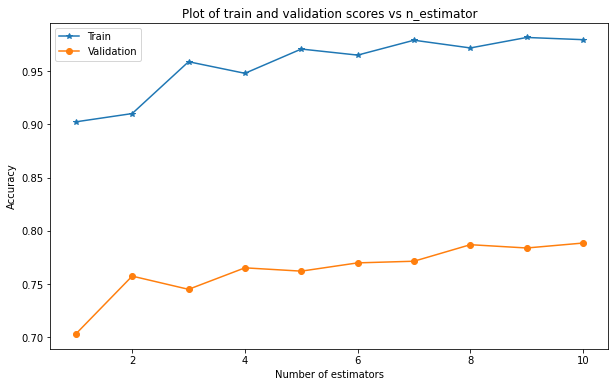

In [10]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_valid, y_valid):
    # define lists to collect scores
    train_scores = []
    valid_scores = []
    # define the n_estimator range
    estimator_depth = [i for i in range(1, 11)]
    # create a loop for n_estimator from 1 to 11
    for est in estimator_depth:
        model = RandomForestClassifier(random_state=12345, n_estimators=est)
        model.fit(X_train, y_train) # train the model 
        # make predictions on train set
        train_predictions = model.predict(X_train)
        train_predictions_acc = accuracy_score(y_train, train_predictions)
        train_scores.append(train_predictions_acc)
        # make predictions on validation set
        predictions_valid = model.predict(X_valid)
        predictions_valid_acc = accuracy_score(y_valid, predictions_valid)
        valid_scores.append(predictions_valid_acc)
        print("n_estimator =", est, ": ", end='')
        print("Valid accuracy : ",predictions_valid_acc," | ","Train accuracy:",train_predictions_acc)
    # plot of train and validation scores vs n_estimator
    plt.figure(figsize=(10,6))
    plt.plot(estimator_depth, train_scores, '-*', label='Train')
    plt.plot(estimator_depth, valid_scores, '-o', label='Validation')
    plt.title('Plot of train and validation scores vs n_estimator')
    plt.xlabel('Number of estimators')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    # print the fn and the plot random forest classifier
random_forest_classifier(features_train, target_train, features_valid, target_valid)

For **' Random Forest Classifier '** , tuning the hyperparameters , we make the `random_state` parameter pseudorandomness static. We also set the number of trees in the forest using `n_estimators` hyperparameter. Using n_estimator value of 10, the random forest classifier given us an accuracy of 98% for the train set and 79% for the valid set.

<hr><b><u>Intermediate conclusion:</u></b>

-  **' Decision Tree Classifier '** model the highest accuracy is: No.4 with valid: 76.3% and Train: 82% 


-  **' Logistic Regression '** model we got combine of : valid: 73% and Train: 74.2% 



-  **' Random Forest Classifier '** model highest accuracy is: No.10 with valid: 79% and Train: 98% 


After checking our three models, we can see that there is a different in quality between them and the highest accuracy that we got is from the **Random forest** model which in No.10 show us **Train** of 98% and **Valid** of 79%, the bottom line is the **logistic regression** model with accuracy of 73% in the **Valid** and 74.2% in **Train** almost in our borderline of 75% but still lower than that.

So for our Check the quality of the model using the test set we going to use the **Random forest**

<hr><div id="Step IV"><h2>Step IV - Check model quality</h2>

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

In [11]:
# Test set with random forest model quality
model = RandomForestClassifier(random_state=12345, n_estimators=10)
model.fit(features_train, target_train) # train the model 
model.score(features_train, target_train) # check the model's accuracy with score() method
test_predictions = model.predict(features_test) # make predictions on test set    
print('Test set:', accuracy_score(target_test, test_predictions))

Test set: 0.7869362363919129


<hr><b><u>Intermediate conclusion:</u></b>

As the result of our **"Investigate the quality of different models by changing hyperparameters"** , we decided to go with the **'Random forest'** model since it's the most accurate between the three that we tested to see the check model quality in the final test and the result is accuracy score of **79%**

<hr><div id="Step V"><h2>Step V - Sanity check the model</h2>

In our additional Tasks section , we want to get the idea of how accuracy the model with the valid set. So we can fit the model on train and prediction the valid set, then evaluate the effectiveness of our algorithm.

To judge the effectiveness of the ML algorithm is to compute with precision, recall, and F1 score. We also going to look at other metrics like balance accuracy score, roc , confusion matrix and classification.   

So, let's go...

<a href="#index"><button style=" background-color: #04AA6D; border: none; color: white; padding: 10px; text-align: center; text-decoration: none; display: inline-block; font-size: 12px; margin: 3px 2px; border-radius: 12px; font-weight: bold;"> Return to index menu</button></a>

<i>Compere: Confusion matrix vs precision vs recall vs f1 vs accuracy score vs roc</i>

In [12]:
# fu that compere: Confusion matrix vs precision vs recall vs f1 vs accuracy score vs roc

def show_sanity_check(X_train, y_train, X_valid, y_valid):
    model = RandomForestClassifier(random_state=12345)
    model.fit(X_train, y_train)
    predictions_valid = model.predict(X_valid) 
    print("\033[1m" + 'Confusion Matrix\n\n' + "\033[0m",confusion_matrix(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Recall:\n ' + "\033[0m", recall_score(y_valid, predictions_valid))
    print()
    print("\033[1m" + 'Precision:\n ' + "\033[0m", '{:.3f}'.format(precision_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'F1-score:\n ' + "\033[0m", '{:.3f}'.format(f1_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Accuracy Score:\n ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_valid, predictions_valid)))
    print()
    print("\033[1m" + 'Balanced Accuracy Score:\n ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_valid, 
                                                                                                       predictions_valid)))
    print()
    print("\033[1m" + 'ROC Score:\n ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_valid, predictions_valid)))
    print()
    print()
    print("\033[1m" + 'Classification report\n\n' + "\033[0m",classification_report(y_valid, predictions_valid))
 # display sanity check
show_sanity_check(features_train, target_train, features_valid, target_valid)

Confusion Matrix

 [[401  42]
 [ 90 110]]

Recall:
  0.55

Precision:
  0.724

F1-score:
  0.625

Accuracy Score:
  79.47%

Balanced Accuracy Score:
  72.76%

ROC Score:
  72.76%


Classification report

               precision    recall  f1-score   support

           0       0.82      0.91      0.86       443
           1       0.72      0.55      0.63       200

    accuracy                           0.79       643
   macro avg       0.77      0.73      0.74       643
weighted avg       0.79      0.79      0.79       643



<hr><b><u>Intermediate conclusion:</u></b>


Our **confusion matrix** help us to gain the insight how well the predictions hold up in the actual values and how correct they are.

The **precision** of our model was 72.4% when it predicts the cell plan of our customers behavior , correct 72% of the of the time. the **Recall** measure how accurate our model and it identify is pattern in the dataset and we can see that isn't close to one. When we calc the **F1 score** we see 62.5%. When model accuracy was computed as 79%. knowing that recall , precision m **F1** and **roc** curve allows us to assess the **classification report** model and should make us think that skeptical about anyone touting only the accuracy of the model especially is imbalanced problems. As we see accuracy does not provide any useful assessment information on some crucial issues, but now we know how to employ better and smarter metrics calculation.      

<hr><div id="general_conclusion"><h2>General conclusion</h2>

<b><u>INTRODUCTION</u></b>

The telecom company that we work in asked us this time to examine the registered customers in the system that didn't yet made the transition to our latest "smart" and "ultra" plans and are still using our legacy one.

Since we already have a diagnosis we made in the past for those customers who have already switched to the new programs, all we have left to do is a general diagnosis of the existing data and move directly from it to building the forecasting model that will give us the answer with the highest accuracy of 0.75.

Our plan:

Dev' a model that will examine the behavior of our customers with legacy plan

Build an ML model that will tell us what is the best plan to our legacy plan customers according to there behavior

<hr>
<b><u>I - Open the data file and study the general information:</u></b>
<br>

<b>Our dataset:</b>
Every observation in the dataset contains monthly behavior information about one user. The information given is as follows:
 
 - `сalls` — number of calls
 
 
 - `minutes` — total call duration in minutes
 
 
 - `messages` — number of text messages
 
 
 - `mb_used` — Internet traffic used in MB
 
 
 - `is_ultra` — plan for the current month (Ultra - 1, Smart - 0)


As we expected of course there isn't any Missing values or Nan or duplicated rows in our dataset which is great , we also notice that almost triple of our users that already use the new plans prefer our 'smart' (2229) one plan than 'ultra' (985).

so let's start by splitting our source into 3 (train,valid and test) , using the ratio 3:1:1 (60% , 20%, 20%)

<hr>
<b><u>II - Split our source data</u></b>

We succeeded to split our data source into 3 (train, valid and test set) , split 60% , 20% , 20% when we using the test size in the first split of 0.2 and in the Second one 0.25

60% into Train which contains 1928 users
20% into Valid which contains 643 users
20% into Test which contains 643 users

<hr>
<b><u>III - Investigate different models quality</u></b>

<b>Our Model dev'</b>

To proceed our mission to build and investigate the quality of different models. Since this classification task , we going to use:

- Decision Tree Classifier , can determines the right plan when we run a learning algorithm to train the model to make predictions. We created a loop to test our max_depth hyperparameter from 1 to 20 to see which depth gives us the best fit. We note that when we test lower max_depth generally do not overfit but poor accuracy (high bias, low variance) and high depth give us overfit and much better accuracy (low bias, high variance), we need a balance between bias and variance - bias variance tradeoff.

- Logistic regression Although this model train is faster , the accuracy is lower and give us Valid of 73% and Train of 74.2% this lower than our target of 75% accuracy.

- Random forest tuning the hyperparameters , we make the random_state parameter pseudorandomness static. We also set the number of trees in the forest using n_estimators hyperparameter. Using n_estimator value of 10, the random forest classifier given us an accuracy of 98% for the train set and 79% for the valid set.

' Decision Tree Classifier ' model the highest accuracy is: No.4 with valid: 76.3% and Train: 82%
' Logistic Regression ' model we got combine of : valid: 73% and Train: 74.2%
' Random Forest Classifier ' model highest accuracy is: No.10 with valid: 79% and Train: 98%

After checking our three models, we can see that there is a different in quality between them and the highest accuracy that we got is from the Random forest model which in No.10 show us Train of 98% and Valid of 79%, the bottom line is the logistic regression model with accuracy of 73% in the Valid and 74.2% in Train almost in our borderline of 75% but still lower than that.

<hr>
<b><u>Step IV - Check model quality</u></b>

As the result of our **"Investigate the quality of different models by changing hyperparameters"** , we decided to go with the **'Random forest'** model since it's the most accurate between the three that we tested to see the check model quality in the final test and the result is accuracy score of **79%**

<hr>
<b><u>Step V - Sanity check the model</u></b>

In our additional Tasks section , we want to get the idea of how accuracy the model with the valid set. So we can fit the model on train and prediction the valid set, then evaluate the effectiveness of our algorithm.

To judge the effectiveness of the ML algorithm is to compute with precision, recall, and F1 score. We also going to look at other metrics like balance accuracy score, roc , confusion matrix and classification.

Our confusion matrix help us to gain the insight how well the predictions hold up in the actual values and how correct they are.

The precision of our model was 72.4% when it predicts the cell plan of our customers behavior , correct 72% of the of the time. the Recall measure how accurate our model and it identify is pattern in the dataset and we can see that isn't close to one. When we calc the F1 score we see 62.5%. When model accuracy was computed as 79%. knowing that recall , precision m F1 and roc curve allows us to assess the classification report model and should make us think that skeptical about anyone touting only the accuracy of the model especially is imbalanced problems. As we see accuracy does not provide any useful assessment information on some crucial issues, but now we know how to employ better and smarter metrics calculation.

<h2>Overall conclusion</h2>

In Project X we first learned that our customers who make use of the more advanced programs prefer the "smart" program over the "ultra" in fact almost 3 times them choose it. We further learned that creating a test model can be too much and too inaccurate for our needs and that we need to choose the one that will give us the highest percentages of accuracy while balancing different data. This is why we ended up choosing the Random Forest No. 10 in our test it presented an impressive figure of 98% train accuracy and 79%  valid accuracy with more impressive accuracy ratios than that of the other two models.

We also add sanity check the model, we computed the precision, F1-score, precision, recall score, balanced accuracy score, ROC score, confusion matrix, and classification report.

At the end we achieve our objectives of developing a model with the highest possible accuracy , we pass the 75% threshold for accuracy as the business task ask. Now we have a model that will pick the right plan for our customers 79% of the time.